# Lab 6 (27-02-2024)

This lab experiments help you master how to do Naive Bayes Classifier. We will be using Heart disease dataset.

In [1]:
Registration_Number = "22011103020"
Name = "Jayashre"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Jayashre and my roll no : 22011103020
Computer IP Address is: 172.28.0.12


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd


og_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_disease.csv")


In [4]:
df = og_dataset.copy()

In [5]:
print(df)

print("----------------------")

print(df.info())

print("----------------------")

print(df.describe())

print("----------------------")

print(df.columns)


     age  sex  chest  resting_blood_pressure  serum_cholestoral  \
0     70    1      4                     130                322   
1     67    0      3                     115                564   
2     57    1      2                     124                261   
3     64    1      4                     128                263   
4     74    0      2                     120                269   
..   ...  ...    ...                     ...                ...   
265   52    1      3                     172                199   
266   44    1      2                     120                263   
267   56    0      2                     140                294   
268   57    1      4                     140                192   
269   67    1      4                     160                286   

     fasting_blood_sugar  resting_electrocardiographic_results  \
0                      0                                     2   
1                      0                                     2 

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns= df.select_dtypes(exclude=['object']).columns

print(categorical_columns)

print("--------------------------------")

print(numerical_columns)

Index([], dtype='object')
--------------------------------
Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal', 'result'],
      dtype='object')


Read through [Naive Bayes Classifier](https://www.geeksforgeeks.org/naive-bayes-classifiers/)

Following experiments are expected
1. Perform monomial naive bayes classifier
    - Plot a graph for accuracy vs %test_data
    - Plot a graph for accuracy vs each feature for 80% test-train split
2. Perform Naive bayes classifier using Gaussian
    - Plot a graph for accuracy with addition of different features

In [7]:
# Monomial Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB

X = df.drop(columns=['result'])
Y = df['result']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

accuracy = accuracy_score(Y_test, mnb.predict(X_test))

print(accuracy)

0.8333333333333334


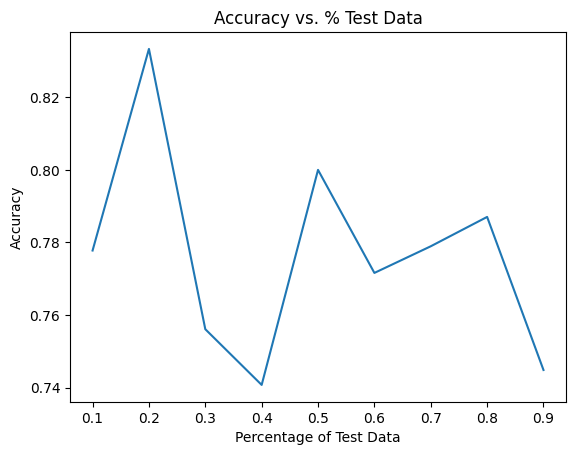

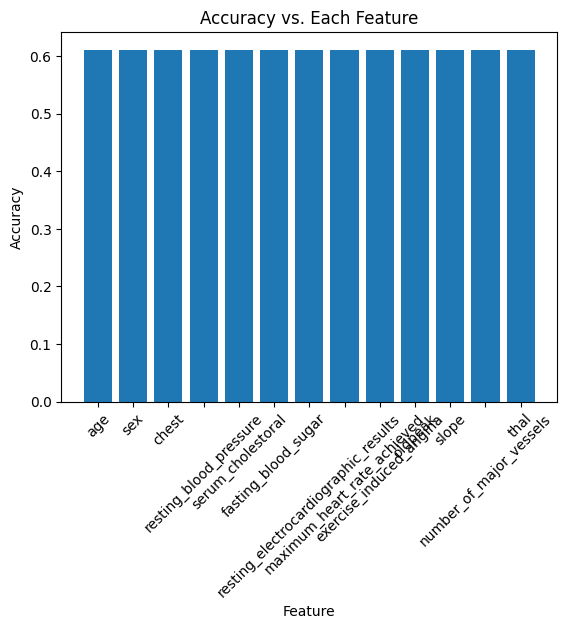

In [9]:
# Graph on accuracy

import numpy as np
import matplotlib.pyplot as plt

# Plot a graph for accuracy vs %test_data
test_sizes = np.arange(0.1, 1, 0.1)
accuracies = []
for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    mnb.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, mnb.predict(X_test))
    accuracies.append(accuracy)

plt.plot(test_sizes, accuracies)
plt.xlabel('Percentage of Test Data')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. % Test Data')
plt.show()

# Plot a graph for accuracy vs each feature for 80% test-train split
accuracies = []
for feature in X.columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df[[feature]], Y, test_size=0.2, random_state=42)
    mnb.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, mnb.predict(X_test))
    accuracies.append(accuracy)

plt.bar(X.columns, accuracies)
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Each Feature')
plt.xticks(rotation=45)
plt.show()



In [10]:
# Naive Bayes using Gaussian

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)


acc_g = accuracy_score(Y_test, gnb.predict(X_test))
print(acc_g)



0.7592592592592593


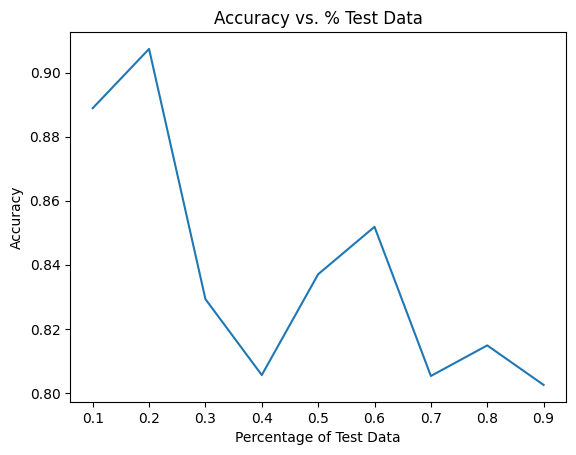

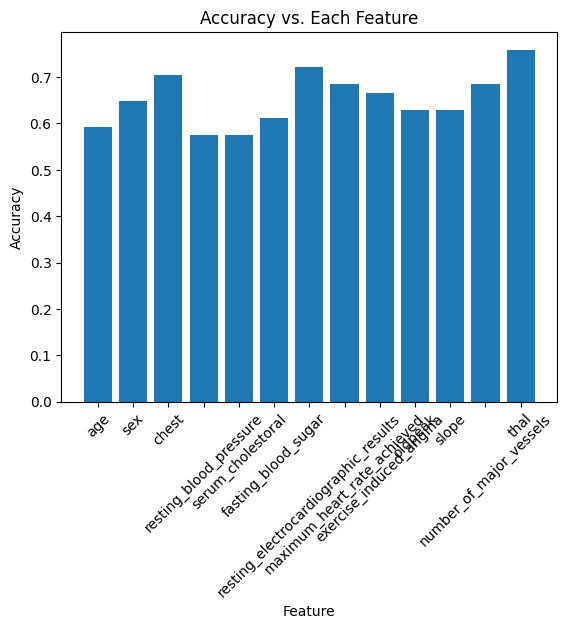

In [11]:
# Graph on accuracy


# Plot a graph for accuracy vs %test_data
test_sizes = np.arange(0.1, 1, 0.1)
accuracies = []
for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    gnb.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, gnb.predict(X_test))
    accuracies.append(accuracy)

plt.plot(test_sizes, accuracies)
plt.xlabel('Percentage of Test Data')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. % Test Data')
plt.show()

# Plot a graph for accuracy vs each feature for 80% test-train split
accuracies = []
for feature in X.columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df[[feature]], Y, test_size=0.2, random_state=42)
    gnb.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, gnb.predict(X_test))
    accuracies.append(accuracy)

plt.bar(X.columns, accuracies)
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Each Feature')
plt.xticks(rotation=45)
plt.show()
